In [1]:
import pyipn
#from pyipn.io import import_lc
from pyipn import copy_template, Universe
from pyipn.detector import Detector
from pyipn.grb import GRB
from pyipn.geometry import Pointing
from pyipn.io.orbits.tle import position_skyfield
import pdb

#import h5py
from astropy.coordinates import SkyCoord, CartesianRepresentation
from astropy.time import Time, TimeDelta
import astropy.units as u
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sys
from datetime import datetime, timedelta

In [2]:
tle_G = 'GLAST2018_01_01 00_00_00__2018_12_31 00_00_00_tle.txt'
tle_I = 'INTEGRAL2018_01_01 00_00_00  2018_12_31 00_00_00_tle.txt'

it = 1000000

start_dt = datetime(2018,1,1,0,0,0,0)
end_dt = datetime(2018,12,31,23,59,59,999999)

def random_dt(start, end):
    rand = np.random.random()
    rand_time = start + timedelta(seconds=((end - start).total_seconds()*rand))
    return rand_time

time_diff = []

In [3]:
for i in range(it):
    sys.stdout.write("\r{} %".format(i/(0.01*it)))
    sys.stdout.flush()
    
    time = random_dt(start_dt, end_dt)
    
    p = Pointing(0.6*360, (0.4-0.5)*180)
    integral = Detector.from_GCRS(position_skyfield(time, tle_I),
                              p,
                              'INTEGRAL')
    glast = Detector.from_GCRS(position_skyfield(time, tle_G),
                            p,
                           'GLAST')
    
    grb = GRB(np.random.random()*360, (np.random.random()-0.5)*180, 100. * u.Mpc, 1000., 1., 1.)
    
    uni = Universe(grb)
    uni.register_detector(integral)
    uni.register_detector(glast)
    
    uni._compute_time_differences()
    if ((not uni._check_occultation(uni._detectors['INTEGRAL'])) & (not uni._check_occultation(uni._detectors['GLAST']))):
        uni._compute_time_differences()
        dt=np.max(uni._T0)
        time_diff.append(dt)

99.9999 %

In [4]:
dt = np.array(time_diff)
np.save('Integral_Glast_dt_2018_1Mil', dt)

<IPython.core.display.Javascript object>


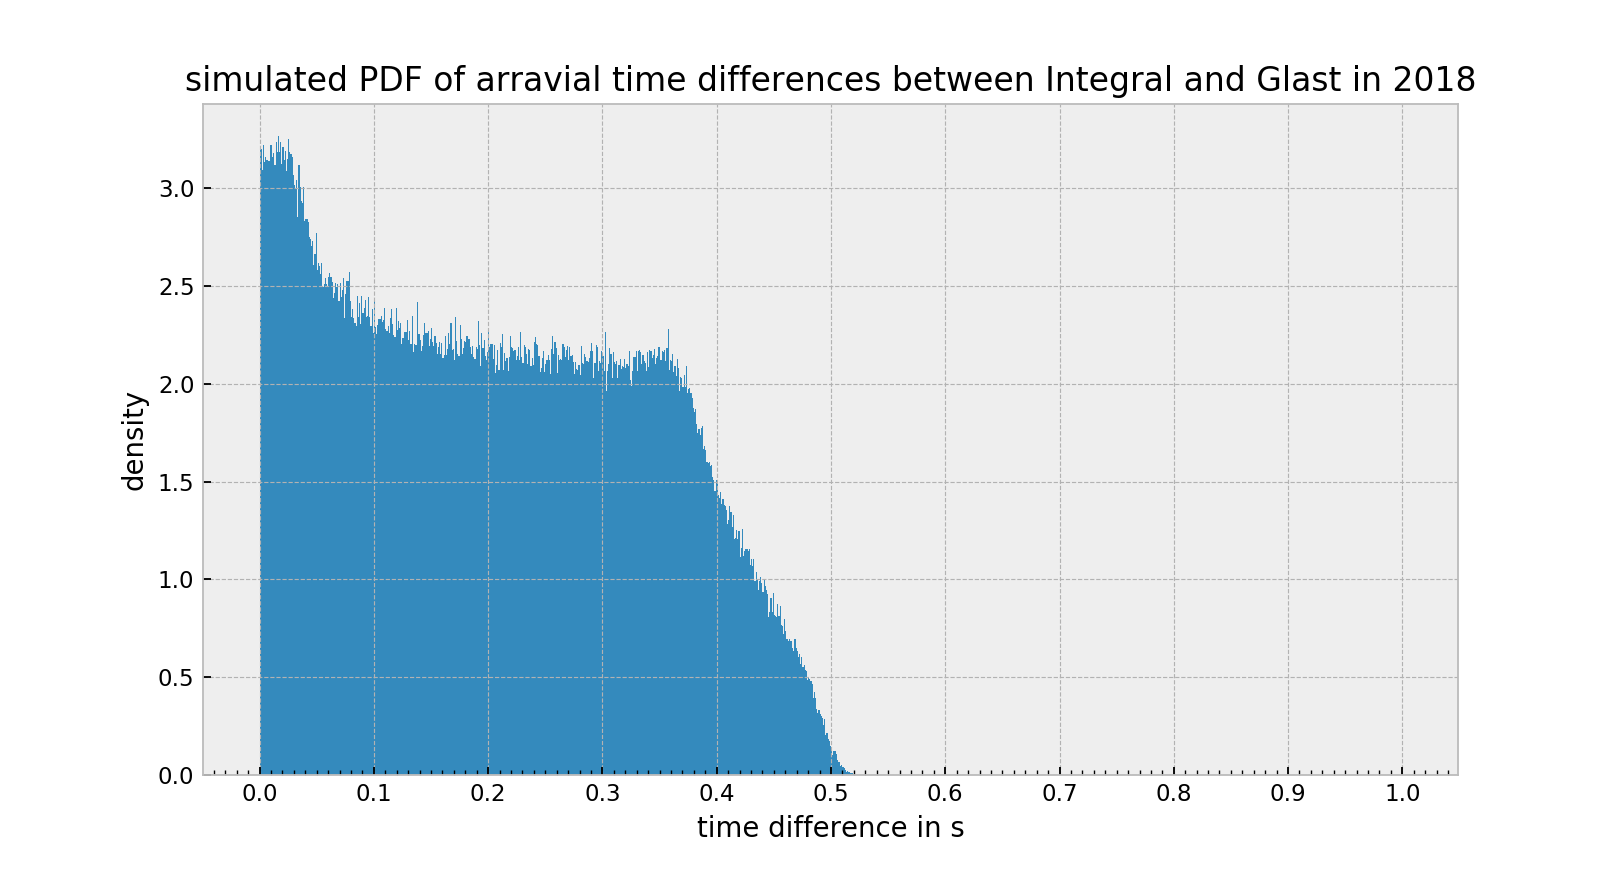

In [11]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
%matplotlib notebook

bins = np.arange(0., 1., 0.001)
plt.style.use('bmh')
fig, axs = plt.subplots()
axs.hist(dt, bins=bins, density=True)
axs.set_ylabel('density')
axs.set_xlabel('time difference in s')
axs.set_title('simulated PDF of arravial time differences between Integral and Glast in 2018')
axs.xaxis.set_major_locator(MultipleLocator(0.1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
fig.savefig('simtimediff.pdf')

In [8]:
print(np.mean(dt))

0.20742361606399434
